-----------------------------------
#### **Programacion Lineal con Python: Analisis de sensibilidad**
**Universidad Tecnologica Nacional - Facultad Buenos Aires** <br>
**Ingenieria Industrial**<br>
**Investigacion Operativa** <br>
Autor: Martin Palazzo <br>
Curso I4051 <br>



In [2]:
pip install pulp

     |████████████████████████████████| 41.2 MB 70 kB/s 


In [3]:
import pulp
from pulp import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dado el siguiente problema de programacion lineal

$$
\begin{matrix}
\underset{x}{\text{max }} &  Z =  300 x_1 + 200 x_2   \\ 
\\ 
2 x_1 + 1 x_2  & \leq 8 \\ 
1 x1 + 2 x_2 & \leq 8 \\ 
x_1, x_2 & \geq 0
\end{matrix}
$$

In [5]:
# definimos si es un problema de minimizacion o maximizacion
prob1 = LpProblem("Toy example 1", LpMaximize)

# definimos las variables de decision
x1 = LpVariable('x1', lowBound=0, cat='Continuous')
x2 = LpVariable('x2', lowBound=0, cat='Continuous')

# primero agregamos la funcion objetivo
prob1 += 300 * x1 + 200 * x2, "Funcion objetivo"

prob1 += 2*x1 + 1*x2 <= 8, "restriccion 1"
prob1 += 1 * x1 + 2 * x2 <= 8, "restriccion 2"

# Resolver el problema con el solver de PULP
prob1.solve()

/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [8]:
# valor de la funcion objetivo
value(prob1.objective)

1333.3333499999999

In [11]:
# obtenemos el valor de la variable de decision X1 en el punto optimo
prob1.variables()[0].varValue

2.6666667

In [12]:
# obtenemos el valor de la variable de decision X1 en el punto optimo
prob1.variables()[1].varValue

2.6666667

In [14]:
# Obtenemos el reporte de calidad del problema de optimizacion
print("Status:", LpStatus[prob1.status])

Status: Optimal


## **Analisis parametrico con $b_1$**

Vamos a modificar el parametro $b_1$ para observar como se modifica el problema en sus variables de decision y funcion objetivo en el punto optimo.

In [50]:
# creo una matriz vacia para ir guardando las variables de decision en cada prueba parametrica
x_param_analysis_b1 = np.zeros((20,2))

# creo un vector vacio para ir guardando la funcion objetivo en cada prueba parametrica
sol_param_b1 = np.zeros((20))

# contador para ir contando cuantas iteraciones hice
counter = 0
for i in range(1,21):
  
  # definimos si es un problema de minimizacion o maximizacion
  prob_sens_b1 = LpProblem("Sensitivity analysis", LpMaximize)

  # definimos las variables de decision
  x1 = LpVariable('x1', lowBound=0, cat='Continuous')
  x2 = LpVariable('x2', lowBound=0, cat='Continuous')

  # primero agregamos la funcion objetivo
  prob_sens_b1 += 300 * x1 + 200 * x2, "Funcion objetivo"

  # definimos restricciones
  prob_sens_b1 += 2*x1 + 1*x2 <= i, "restriccion 1"
  prob_sens_b1 += 1 * x1 + 2 * x2 <= 8, "restriccion 2"

  # Resolver el problema con el solver de PULP
  prob_sens_b1.solve()
  
  # valor de la funcion objetivo
  sol_param_b1[counter] = value(prob_sens_b1.objective)

  # obtenemos el valor de la variable de decision X1 en el punto optimo
  x_param_analysis_b1[counter,0] = prob_sens_b1.variables()[0].varValue
  x_param_analysis_b1[counter,1] = prob_sens_b1.variables()[1].varValue

  counter += 1 
  print("solve iteration " + str(i))




/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


solve iteration 1
solve iteration 2
solve iteration 3
solve iteration 4
solve iteration 5
solve iteration 6
solve iteration 7
solve iteration 8
solve iteration 9
solve iteration 10
solve iteration 11
solve iteration 12
solve iteration 13
solve iteration 14
solve iteration 15
solve iteration 16
solve iteration 17
solve iteration 18
solve iteration 19
solve iteration 20


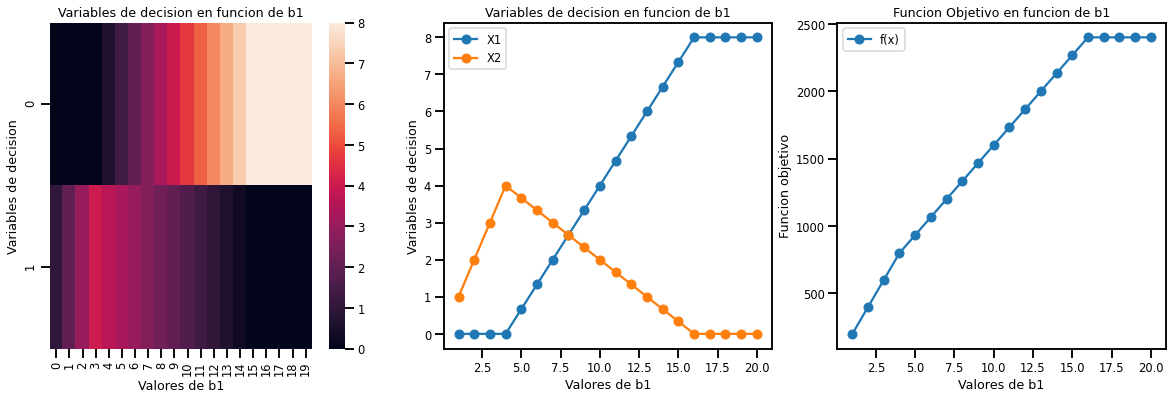

In [57]:

# imprimimos en pantalla los valores de las variables de decision 
# a lo largo de los distintos valores del parametro b0
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('talk',font_scale = 0.7)
fig, ax = plt.subplots(1, 3, figsize = (20,6))


sns.heatmap(np.transpose(x_param_analysis_b1), ax = ax[0])
ax[1].plot(np.arange(1,21),x_param_analysis_b1[:,0], marker = 'o', label = 'X1')
ax[1].plot(np.arange(1,21),x_param_analysis_b1[:,1], marker = 'o', label = 'X2')
ax[2].plot(np.arange(1,21),sol_param_b1, marker = 'o', label = 'f(x)')

ax[0].set_title('Variables de decision en funcion de b1')
ax[1].set_title('Variables de decision en funcion de b1')
ax[2].set_title('Funcion Objetivo en funcion de b1')

ax[0].set_xlabel('Valores de b1')
ax[0].set_ylabel('Variables de decision')

ax[1].set_xlabel('Valores de b1')
ax[1].set_ylabel('Variables de decision')

ax[2].set_xlabel('Valores de b1')
ax[2].set_ylabel('Funcion objetivo')

ax[1].legend()
ax[2].legend()

plt.show()


## **Analisis parametrico con $b_2$**

Vamos a modificar el parametro $b_2$ para observar como se modifica el problema en sus variables de decision y funcion objetivo en el punto optimo.

In [52]:
# creo una matriz vacia para ir guardando las variables de decision en cada prueba parametrica
x_param_analysis_b2 = np.zeros((20,2))

# creo un vector vacio para ir guardando la funcion objetivo en cada prueba parametrica
sol_param_b2 = np.zeros((20))

# contador para ir contando cuantas iteraciones hice
counter = 0
for i in range(1,21):
  
  # definimos si es un problema de minimizacion o maximizacion
  prob_sens_b2 = LpProblem("Sensitivity analysis", LpMaximize)

  # definimos las variables de decision
  x1 = LpVariable('x1', lowBound=0, cat='Continuous')
  x2 = LpVariable('x2', lowBound=0, cat='Continuous')

  # primero agregamos la funcion objetivo
  prob_sens_b2 += 300 * x1 + 200 * x2, "Funcion objetivo"

  prob_sens_b2 += 2*x1 + 1*x2 <= 8, "restriccion 1"
  prob_sens_b2 += 1 * x1 + 2 * x2 <= i, "restriccion 2"

  # Resolver el problema con el solver de PULP
  prob_sens_b2.solve()
  
  # valor de la funcion objetivo
  sol_param_b2[counter] = value(prob_sens_b2.objective)

  # obtenemos el valor de la variable de decision X1 en el punto optimo
  x_param_analysis_b2[counter,0] = prob_sens_b2.variables()[0].varValue
  x_param_analysis_b2[counter,1] = prob_sens_b2.variables()[1].varValue

  counter += 1 
  print("solve iteration " + str(i))




/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


solve iteration 1
solve iteration 2
solve iteration 3
solve iteration 4
solve iteration 5
solve iteration 6
solve iteration 7
solve iteration 8
solve iteration 9
solve iteration 10
solve iteration 11
solve iteration 12
solve iteration 13
solve iteration 14
solve iteration 15
solve iteration 16
solve iteration 17
solve iteration 18
solve iteration 19
solve iteration 20


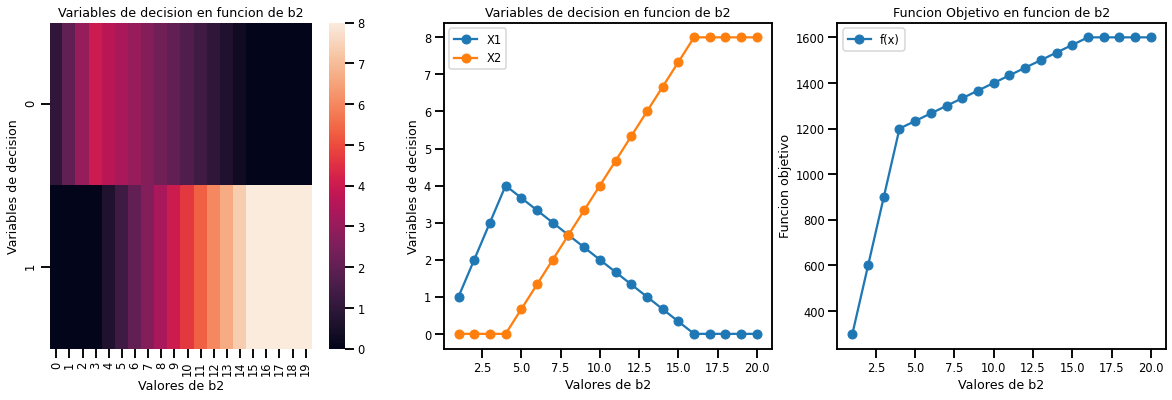

In [56]:

# imprimimos en pantalla los valores de las variables de decision 
# a lo largo de los distintos valores del parametro b2
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('talk',font_scale = 0.7)
fig, ax = plt.subplots(1, 3, figsize = (20,6))


sns.heatmap(np.transpose(x_param_analysis_b2), ax = ax[0])
ax[1].plot(np.arange(1,21),x_param_analysis_b2[:,0], marker = 'o', label = 'X1')
ax[1].plot(np.arange(1,21),x_param_analysis_b2[:,1], marker = 'o', label = 'X2')
ax[2].plot(np.arange(1,21),sol_param_b2, marker = 'o', label = 'f(x)')

ax[0].set_title('Variables de decision en funcion de b2')
ax[1].set_title('Variables de decision en funcion de b2')
ax[2].set_title('Funcion Objetivo en funcion de b2')

ax[0].set_xlabel('Valores de b2')
ax[0].set_ylabel('Variables de decision')

ax[1].set_xlabel('Valores de b2')
ax[1].set_ylabel('Variables de decision')

ax[2].set_xlabel('Valores de b2')
ax[2].set_ylabel('Funcion objetivo')

ax[1].legend()
ax[2].legend()

plt.show()


## **Analisis parametrico con $b_1$ y $b_2$**

Vamos a modificar el parametro $b_1$ y $b_2$ para observar como se modifica el problema en sus variables de decision y funcion objetivo en el punto optimo.

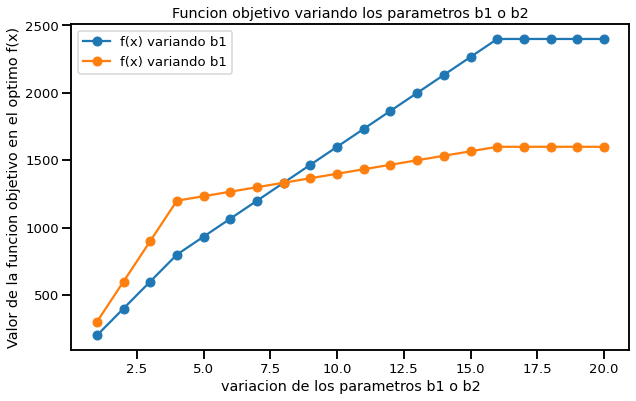

In [65]:
sns.set_context('talk', font_scale= 0.8)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1,21),sol_param_b1, marker = 'o', label = 'f(x) variando b1')
plt.plot(np.arange(1,21),sol_param_b2, marker = 'o', label = 'f(x) variando b1')
plt.legend()
plt.title('Funcion objetivo variando los parametros b1 o b2')
plt.xlabel('variacion de los parametros b1 o b2')
plt.ylabel('Valor de la funcion objetivo en el optimo f(x)')
plt.show()

## **Analisis parametrico con $c_1$**

Vamos a modificar el parametro $c_1$ para observar como se modifica el problema en sus variables de decision y funcion objetivo en el punto optimo.

In [68]:
# creo una matriz vacia para ir guardando las variables de decision en cada prueba parametrica
x_param_analysis_c1 = np.zeros((30,2))

# creo un vector vacio para ir guardando la funcion objetivo en cada prueba parametrica
sol_param_c1 = np.zeros((30))

# contador para ir contando cuantas iteraciones hice
counter = 0
for i in range(1,301,10):
  
  # definimos si es un problema de minimizacion o maximizacion
  prob_sens_c1 = LpProblem("Sensitivity analysis", LpMaximize)

  # definimos las variables de decision
  x1 = LpVariable('x1', lowBound=0, cat='Continuous')
  x2 = LpVariable('x2', lowBound=0, cat='Continuous')

  # primero agregamos la funcion objetivo
  prob_sens_c1 += i * x1 + 200 * x2, "Funcion objetivo"

  prob_sens_c1 += 2*x1 + 1*x2 <= 8, "restriccion 1"
  prob_sens_c1 += 1 * x1 + 2 * x2 <= 8, "restriccion 2"

  # Resolver el problema con el solver de PULP
  prob_sens_c1.solve()
  
  # valor de la funcion objetivo
  sol_param_c1[counter] = value(prob_sens_c1.objective)

  # obtenemos el valor de la variable de decision X1 en el punto optimo
  x_param_analysis_c1[counter,0] = prob_sens_c1.variables()[0].varValue
  x_param_analysis_c1[counter,1] = prob_sens_c1.variables()[1].varValue

  counter += 1 
  print("solve iteration " + str(i))




/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


solve iteration 1
solve iteration 11
solve iteration 21
solve iteration 31
solve iteration 41
solve iteration 51
solve iteration 61
solve iteration 71
solve iteration 81
solve iteration 91
solve iteration 101
solve iteration 111
solve iteration 121
solve iteration 131
solve iteration 141
solve iteration 151
solve iteration 161
solve iteration 171
solve iteration 181
solve iteration 191
solve iteration 201
solve iteration 211
solve iteration 221
solve iteration 231
solve iteration 241
solve iteration 251
solve iteration 261
solve iteration 271
solve iteration 281
solve iteration 291


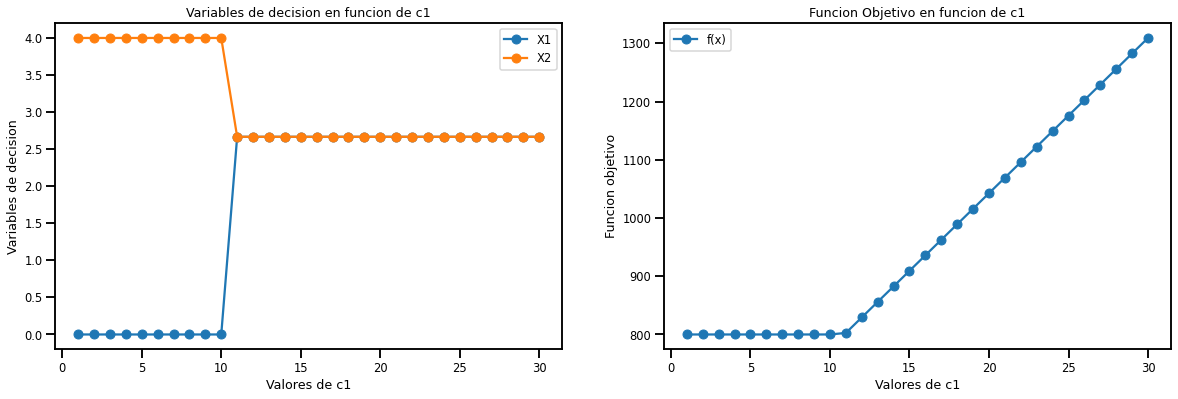

In [72]:

# imprimimos en pantalla los valores de las variables de decision 
# a lo largo de los distintos valores del parametro c1
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('talk',font_scale = 0.7)
fig, ax = plt.subplots(1, 2, figsize = (20,6))


ax[0].plot(np.arange(1,31),x_param_analysis_c1[:,0], marker = 'o', label = 'X1')
ax[0].plot(np.arange(1,31),x_param_analysis_c1[:,1], marker = 'o', label = 'X2')
ax[1].plot(np.arange(1,31),sol_param_c1, marker = 'o', label = 'f(x)')

ax[0].set_title('Variables de decision en funcion de c1')
ax[1].set_title('Funcion Objetivo en funcion de c1')

ax[0].set_xlabel('Valores de c1')
ax[0].set_ylabel('Variables de decision')

ax[1].set_xlabel('Valores de c1')
ax[1].set_ylabel('Funcion objetivo')

ax[0].legend()
ax[1].legend()

plt.show()


In [73]:
## **Diet problem: analisis de sensibilidad**

## **Diet problem: analisis de sensiblidad**

# **Ejercicio**
Consideremos el problema de elegir comida preparada para alcanzar ciertos requisitos nutricionales. Supongamos que las cenas preparadas estan disponibles al siguiente precio:
- Carne: 390
- Pollo: 290
- Pescado: 300
- Roll vegetariano: 250
- Tarta de queso: 230
- Pasta: 100

Estos platos estan detallan porcentajes por plato de la cantidad de vitaminas diarias que aporta cada porcion. 

|   | Vita. A  | Vita. C  | Vita. B1  | Vita. B2  |
|---|---|---|---|---|
| Carne  |  40% | 15%  | 10%  | 15%  |
| Pollo  |  20 | 0  | 20  | 20  |
|  Pescado |  20 | 10  |  15 | 10  |
|  Roll Vegetariano | 5  | 20  | 10  | 10  |
|  Tarta de queso |  15 | 5  | 15  | 20  |
| Pasta |  5 | 5  | 10  |  10 |

El problema solicita determinar la combinacion de porciones que se debe comprar para poder alcanzar los requerimientos semanales de cada vitamina, es decir llegar a 700% por vitamina. 


# **Resolucion**
Primero podemos determinar las variables de decision:
- X_1: Carne
- X_2: Pollo
- X_3: Pescado
- X_4: Roll Veggie
- X_5: Tarta de queso
- X_6: Pasta

Por lo que la funcion objetivo quedara determinada como

$$
z = c_1 x_1 + c_2 x_2 + c_3 x_3 + c_4 x_4 + c_5 x_5 + c_6 x_6 
$$

donde 

$$
z = 390 x_1 + 290 x_2 + 300 x_3 + 250 x_4 +230 x_5 + 100 x_6
$$

Por otro lado las restricciones de cantidad minima necesaria a consumir de cada vitamina por semana
$$
40 x_1 + 20 x_2 + 20 x_3 + 5 x_4 + 15 x_5 + 5 x_6 \geq 700 \\ 
15 x_1 + 0 x_2 + 10 x_3 + 20 x_4 + 5 x_5 + 5 x_6 \geq 700 \\
10 x_1 + 20 x_2 + 15 x_3 + 10 x_4 + 15 x_5 + 10 x_6 \geq 700 \\
15 x_1 + 20 x_2 + 10 x_3 + 10 x_4 + 20 x_5 + 10 x_6 \geq 700 \\
$$

ademas las condiciones de no-negatividad

$$
x_1, x_2, x_3, x_4, x_5, x_6 \geq 0 \\ 
$$

In [94]:
# creo una matriz vacia para ir guardando las variables de decision en cada prueba parametrica
x_param_analysis_c1 = np.zeros((30,6))

# creo un vector vacio para ir guardando la funcion objetivo en cada prueba parametrica
sol_param_c1 = np.zeros((30))

# contador para ir contando cuantas iteraciones hice
counter = 0
for i in range(1,301,10):
  
  # definimos si es un problema de minimizacion o maximizacion
  prob_sens_diet_c1 = LpProblem("DietProblem", LpMinimize)

  # definimos las variables de decision
  x1 = LpVariable('x1', lowBound=0, cat='Continuous')
  x2 = LpVariable('x2', lowBound=0, cat='Continuous')
  x3 = LpVariable('x3', lowBound=0, cat='Continuous')
  x4 = LpVariable('x4', lowBound=0, cat='Continuous')
  x5 = LpVariable('x5', lowBound=0, cat='Continuous')
  x6 = LpVariable('x6', lowBound=0, cat='Continuous')



  # primero agregamos la funcion objetivo
  prob_sens_diet_c1 += i * x1 + 290 * x2 + 300 * x3 + 250 * x4 + 230 * x5 + 100 * x6, "FuncionObjetivo"
  prob_sens_diet_c1 += 40 * x1 + 20 * x2 + 20 * x3 + 5 * x4 + 15 * x5 + 5 * x6 >= 700, "VitaminaA"
  prob_sens_diet_c1 += 15 * x1 + 0 * x2 +  10 * x3 + 20 * x4 + 5 * x5 + 5 * x6 >= 700, "VitaminaC"
  prob_sens_diet_c1 += 10 * x1 + 20 * x2 + 15 * x3 + 10 * x4 + 15 * x5 + 10 * x6 >= 700, "VitaminaB1"
  prob_sens_diet_c1 += 15 * x1 + 20 * x2 + 10 * x3 + 10 * x4 + 20 * x5 + 10 * x6 >= 700, "VitaminaB2"

  # Resolver el problema con el solver de PULP
  prob_sens_diet_c1.solve()
  
  # valor de la funcion objetivo
  sol_param_c1[counter] = value(prob_sens_diet_c1.objective)

  # obtenemos el valor de la variable de decision X1 en el punto optimo
  x_param_analysis_c1[counter,0] = prob_sens_diet_c1.variables()[0].varValue
  x_param_analysis_c1[counter,1] = prob_sens_diet_c1.variables()[1].varValue
  x_param_analysis_c1[counter,2] = prob_sens_diet_c1.variables()[2].varValue
  x_param_analysis_c1[counter,3] = prob_sens_diet_c1.variables()[3].varValue
  x_param_analysis_c1[counter,4] = prob_sens_diet_c1.variables()[4].varValue
  x_param_analysis_c1[counter,5] = prob_sens_diet_c1.variables()[5].varValue

  counter += 1 
  print("solve iteration " + str(i))




solve iteration 1
solve iteration 11
solve iteration 21
solve iteration 31
solve iteration 41
solve iteration 51
solve iteration 61
solve iteration 71
solve iteration 81
solve iteration 91
solve iteration 101
solve iteration 111
solve iteration 121
solve iteration 131
solve iteration 141
solve iteration 151
solve iteration 161
solve iteration 171
solve iteration 181
solve iteration 191
solve iteration 201
solve iteration 211
solve iteration 221
solve iteration 231
solve iteration 241
solve iteration 251
solve iteration 261
solve iteration 271
solve iteration 281
solve iteration 291


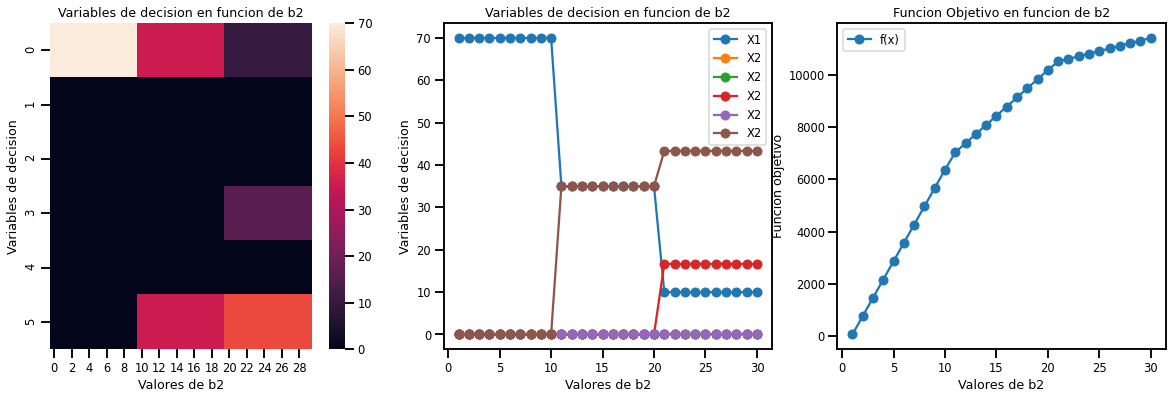

In [95]:

# imprimimos en pantalla los valores de las variables de decision 
# a lo largo de los distintos valores del parametro b2
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('talk',font_scale = 0.7)
fig, ax = plt.subplots(1, 3, figsize = (20,6))


sns.heatmap(np.transpose(x_param_analysis_c1), ax = ax[0])
ax[1].plot(np.arange(1,31),x_param_analysis_c1[:,0], marker = 'o', label = 'X1')
ax[1].plot(np.arange(1,31),x_param_analysis_c1[:,1], marker = 'o', label = 'X2')
ax[1].plot(np.arange(1,31),x_param_analysis_c1[:,2], marker = 'o', label = 'X2')
ax[1].plot(np.arange(1,31),x_param_analysis_c1[:,3], marker = 'o', label = 'X2')
ax[1].plot(np.arange(1,31),x_param_analysis_c1[:,4], marker = 'o', label = 'X2')
ax[1].plot(np.arange(1,31),x_param_analysis_c1[:,5], marker = 'o', label = 'X2')
ax[2].plot(np.arange(1,31),sol_param_c1, marker = 'o', label = 'f(x)')

ax[0].set_title('Variables de decision en funcion de b2')
ax[1].set_title('Variables de decision en funcion de b2')
ax[2].set_title('Funcion Objetivo en funcion de b2')

ax[0].set_xlabel('Valores de b2')
ax[0].set_ylabel('Variables de decision')

ax[1].set_xlabel('Valores de b2')
ax[1].set_ylabel('Variables de decision')

ax[2].set_xlabel('Valores de b2')
ax[2].set_ylabel('Funcion objetivo')

ax[1].legend()
ax[2].legend()

plt.show()


In [106]:
# creo una matriz vacia para ir guardando las variables de decision en cada prueba parametrica
x_param_analysis_c1 = np.zeros((50,6))

# creo un vector vacio para ir guardando la funcion objetivo en cada prueba parametrica
sol_param_c1 = np.zeros((50))

# contador para ir contando cuantas iteraciones hice
counter = 0
for i in range(1,501,10):
  
  # definimos si es un problema de minimizacion o maximizacion
  prob_sens_diet_c1 = LpProblem("DietProblem", LpMinimize)

  # definimos las variables de decision
  x1 = LpVariable('x1', lowBound=0, cat='Continuous')
  x2 = LpVariable('x2', lowBound=0, cat='Continuous')
  x3 = LpVariable('x3', lowBound=0, cat='Continuous')
  x4 = LpVariable('x4', lowBound=0, cat='Continuous')
  x5 = LpVariable('x5', lowBound=0, cat='Continuous')
  x6 = LpVariable('x6', lowBound=0, cat='Continuous')



  # primero agregamos la funcion objetivo
  prob_sens_diet_c1 += 390*(1-np.random.rand()*0.1) * x1 + 290*(1-np.random.rand()*0.1) * x2 + 300*(1-np.random.rand()*0.1) * x3 + 250*(1-np.random.rand()*0.1) * x4 + 230*(1-np.random.rand()*0.1) * x5 + 100*(1-np.random.rand()*0.1) * x6, "FuncionObjetivo"
  prob_sens_diet_c1 += 40 * x1 + 20 * x2 + 20 * x3 + 5 * x4 + 15 * x5 + 5 * x6 >= 700, "VitaminaA"
  prob_sens_diet_c1 += 15 * x1 + 0 * x2 +  10 * x3 + 20 * x4 + 5 * x5 + 5 * x6 >= 700, "VitaminaC"
  prob_sens_diet_c1 += 10 * x1 + 20 * x2 + 15 * x3 + 10 * x4 + 15 * x5 + 10 * x6 >= 700, "VitaminaB1"
  prob_sens_diet_c1 += 15 * x1 + 20 * x2 + 10 * x3 + 10 * x4 + 20 * x5 + 10 * x6 >= 700, "VitaminaB2"

  # Resolver el problema con el solver de PULP
  prob_sens_diet_c1.solve()
  
  # valor de la funcion objetivo
  sol_param_c1[counter] = value(prob_sens_diet_c1.objective)

  # obtenemos el valor de la variable de decision X1 en el punto optimo
  x_param_analysis_c1[counter,0] = prob_sens_diet_c1.variables()[0].varValue
  x_param_analysis_c1[counter,1] = prob_sens_diet_c1.variables()[1].varValue
  x_param_analysis_c1[counter,2] = prob_sens_diet_c1.variables()[2].varValue
  x_param_analysis_c1[counter,3] = prob_sens_diet_c1.variables()[3].varValue
  x_param_analysis_c1[counter,4] = prob_sens_diet_c1.variables()[4].varValue
  x_param_analysis_c1[counter,5] = prob_sens_diet_c1.variables()[5].varValue

  counter += 1 
  print("solve iteration " + str(i))




solve iteration 1
solve iteration 11
solve iteration 21
solve iteration 31
solve iteration 41
solve iteration 51
solve iteration 61
solve iteration 71
solve iteration 81
solve iteration 91
solve iteration 101
solve iteration 111
solve iteration 121
solve iteration 131
solve iteration 141
solve iteration 151
solve iteration 161
solve iteration 171
solve iteration 181
solve iteration 191
solve iteration 201
solve iteration 211
solve iteration 221
solve iteration 231
solve iteration 241
solve iteration 251
solve iteration 261
solve iteration 271
solve iteration 281
solve iteration 291
solve iteration 301
solve iteration 311
solve iteration 321
solve iteration 331
solve iteration 341
solve iteration 351
solve iteration 361
solve iteration 371
solve iteration 381
solve iteration 391
solve iteration 401
solve iteration 411
solve iteration 421
solve iteration 431
solve iteration 441
solve iteration 451
solve iteration 461
solve iteration 471
solve iteration 481
solve iteration 491


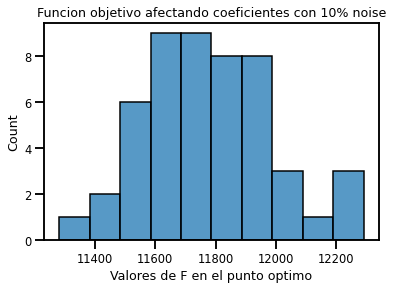

In [108]:
sns.histplot(sol_param_c1, bins = 10)
plt.title('Funcion objetivo afectando coeficientes con 10% noise')
plt.xlabel('Valores de F en el punto optimo')
plt.show()